In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15728/176984250.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/train.csv")
/var/folders/12/33kq22951gn7jfpz3d32v_qc0000gn/T/ipykernel_15728/176984250.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv("../data/test.csv")


In [3]:
percentage = (train.isna().sum() / train.shape[0]) * 100
columns_to_delete = [col for col in train.columns if
                          col != "Electric range (km)" and percentage[col] >= 40]
columns_to_delete.extend(["r", "Status", "IT", 'Date of registration', "Mp"])

Valeurs manquantes du train supprimées ✅


In [4]:
nan_table = pd.DataFrame(columns=["Variable", "Pourcentages de valeurs manquantes"])

for col in train:
    pcentage = (train[col].isna().sum() / train.shape[0]) * 100
    nan_table.loc[len(nan_table)] = [col, pcentage]

nan_table = nan_table.sort_values(by=["Pourcentages de valeurs manquantes"], ascending=False).reset_index(
    drop=True)

In [5]:
nan_table

,Variable,Pourcentages de valeurs manquantes
0,Electric range (km),82.957451
1,Fuel consumption,23.506914
2,ec (cm3),13.507824
3,Mt,11.097134
4,VFN,8.614134
5,At2 (mm),2.341604
6,At1 (mm),2.188229
7,Cn,1.521888
8,Ve,0.423646
9,ep (KW),0.253406


# Electric Range

In [7]:
train['Electric range (km)'].fillna(0, inplace=True)

# Ec (cm3)

In [8]:
train['ec (cm3)'].fillna(0, inplace=True)

# Fuel Consumption

In [34]:
train.loc[(train["Fuel consumption "].isna()) & (train["Ft"] == 'ELECTRIC'), "Fuel consumption "] = 0

In [37]:
train.loc[(train["Fuel consumption "].isna())]["Ft"].value_counts()

Ft
PETROL             497957
DIESEL             166115
PETROL/ELECTRIC     69183
LPG                 20785
DIESEL/ELECTRIC      3216
NG                    547
HYDROGEN              229
NG-BIOMETHANE          46
UNKNOWN                20
E85                    15
Name: count, dtype: int64

In [58]:
medians = train.groupby('Ft')['Fuel consumption '].median()

In [59]:
for ft, median in medians.items():
    train.loc[(train["Fuel consumption "].isna()) & (train["Ft"] == ft), 'Fuel consumption '] = median

In [61]:
train["Fuel consumption "].isna().sum()

0

# Mt

In [75]:
train.loc[(train["Mt"].isna())]["Cn"].value_counts()

Cn
PANDA                 80618
YPSILON               32761
PUMA                  28973
TOYOTA YARIS CROSS    22380
FIAT 500              22160
                      ...  
R RC740                   1
BT7322                    1
RDX                       1
S-SERIES S 70SP           1
ZHIDOU. ZD                1
Name: count, Length: 3459, dtype: int64

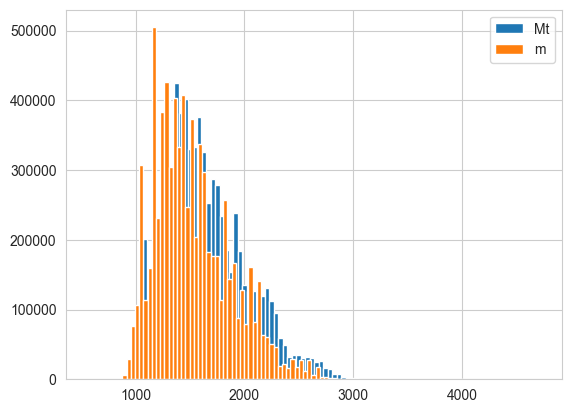

In [114]:
from matplotlib import pyplot as plt

plt.hist(train["Mt"], bins=100, label = "Mt")
plt.hist(train["m (kg)"], bins = 100, label= 'm')
plt.legend()
plt.show()

In [95]:
numericals = train.select_dtypes(exclude = ["object"]).columns.to_list()

In [96]:
train[numericals].corr()["Ewltp (g/km)"]

ID                    -0.005225
m (kg)                -0.235785
Mt                    -0.185097
Ewltp (g/km)           1.000000
W (mm)                 0.053949
At1 (mm)               0.060442
At2 (mm)               0.061824
ec (cm3)               0.672611
ep (KW)                0.034477
Fuel consumption       0.933544
Electric range (km)   -0.628966
Name: Ewltp (g/km), dtype: float64

In [99]:
na = train.loc[train["Mt"].isna()]["m (kg)"]
train.loc[train["Mt"].isna(), "Mt"] = na

In [113]:
train["Mt"].fillna(train["Mt"].mean(), inplace = True)

# AT1

In [124]:
mean_At1_by_Cn = train.groupby('Cn')['At1 (mm)'].transform('mean')

In [126]:
train['At1 (mm)'].fillna(mean_At1_by_Cn, inplace=True)

In [127]:
train["At1 (mm)"].isna().sum()

4533

In [132]:
train["At1 (mm)"].fillna(train["At1 (mm)"].mean(), inplace = True)

In [133]:
train["At1 (mm)"].isna().sum()

0

# AT2

In [134]:
mean_At2_by_Cn = train.groupby('Cn')['At2 (mm)'].transform('mean')

In [135]:
train['At2 (mm)'].fillna(mean_At2_by_Cn, inplace=True)

In [136]:
train["At2 (mm)"].isna().sum()

5428

In [137]:
train["At2 (mm)"].fillna(train["At2 (mm)"].mean(), inplace = True)

In [138]:
train["At2 (mm)"].isna().sum()

0

In [140]:
for col in numericals :
    print(col, train[col].isna().sum()/train.shape[0])

ID 0.0
m (kg) 1.3207162666943489e-05
Mt 0.0
Ewltp (g/km) 0.0
W (mm) 0.001622896148514016
At1 (mm) 0.0
At2 (mm) 0.0
ec (cm3) 0.0
ep (KW) 0.0025340583009064474
Fuel consumption  0.0
Electric range (km) 0.0


# m 

In [141]:
mean_m_by_Cn = train.groupby('Cn')['m (kg)'].transform('mean')

In [142]:
train["m (kg)"].fillna(mean_m_by_Cn, inplace = True)

In [143]:
train["m (kg)"].isna().sum()

18

In [144]:
train["m (kg)"].fillna(train["m (kg)"].mean(), inplace = True)

In [145]:
train["m (kg)"].isna().sum()

0

# W

In [146]:
mean_W_by_Cn = train.groupby('Cn')['W (mm)'].transform('mean')
train["W (mm)"].fillna(mean_m_by_Cn, inplace=True)
train["W (mm)"].isna().sum()
train["W (mm)"].fillna(train["W (mm)"].mean(), inplace=True)
train["W (mm)"].isna().sum()

0

# ep

In [147]:
mean_W_by_Cn = train.groupby('Cn')["ep (KW)"].transform('mean')
train["ep (KW)"].fillna(mean_m_by_Cn, inplace=True)
train["ep (KW)"].isna().sum()
train["ep (KW)"].fillna(train["ep (KW)"].mean(), inplace=True)
train["ep (KW)"].isna().sum()

0